<img src="https://www.digitalhouse.com/logo-DH.png" width="200" height="100" align="left">

<h3><b>Curso:</b> Data Science / <b>Año:</b> 2020 / <b>Sede:</b> Casa</h3>

-----

<h3><b>TP Integrador:</b> Text Mining de <i>tweets</i> de anuncios del gobierno durante la cuarentena.</h3>
<blockquote>
        <ul>
          <li><i>Sentiment analysis</i> de los comentarios de los usuarios.</li>
          <li>Clustering de <i>tweets</i> de los usuarios.</li>
        </ul>
</blockquote>

<h3><b>Grupo 10:</b></h3>
<blockquote>
        <ul>
          <li>Maria Eugenia Perotti</li>
          <li>Gastón Ortíz</li>
        </ul>
</blockquote>

# Sobre el trabajo.

Nuestra propuesta es realizar _text mining_ sobre tweets publicados durante la cuarentena, concentrándonos específicamente en las fechas en las que el presidente hace los anuncios relacionados al distanciamiento social preventivo y obligatorio.

## Criterios de búsqueda.
Debido al gran volumen de _tweets_ y a las limitaciones de la biblioteca que estamos utilizando, nos vimos forzados a limitar los criterios de búsqueda.

<b><u>Ciudades:</u></b>
* Buenos Aires
* Cordoba
* Rosario
* Mendoza
* Tucumán
* San Juan
* Neuquén
* Paraná
* Comodoro Rivadavia

<b><u>Cuentas:</u></b>
* Ministerio de Salud de la Nación | @msalnacion
* Casa Rosada | @CasaRosada
* Horacio Rodríguez Larreta | @horaciorlarreta
* Alberto Fernández | @alferdez
* Alberto Fernández Prensa | @alferdezprensa
* Axel Kicillof | @Kicillofok
* Cristina Kirchner | @CFKArgentina

<b><u>Hashtags:</u></b>
* #covid19
* #covid
* #coronavirus
* #cuarentena
* #albertofernandez

# Preparación de libraries y funciones.

## Configuración Colab.

In [5]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    !pip install GetOldTweets3
    !pip install unidecode
    ruta_drive = "/content/drive/My Drive/TP Integrador/Notebooks/Data/"
except ModuleNotFoundError:    
    print("Se está trabajando localmente")

Se está trabajando localmente


## Imports.

In [6]:
import numpy as np
import pandas as pd
import GetOldTweets3 as got
import datetime
from textblob import TextBlob
import re
import unidecode
import matplotlib.pyplot as plt
import time

## Definición de funciones.
En esta sección definimos las funciones que vamos a utilizar en la notebook.

### Función para obtener los tweets de acuerdo a los criterios de búsqueda.

In [7]:
def get_tweets(list_criterios, fecha_inicio, fecha_final, ubicacion, radio, maximo=250):
    tweets_total = []
    for criterio in list_criterios:
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(criterio).setSince(fecha_inicio).setUntil(fecha_final).setLang("es").setNear(ubicacion).setWithin(radio).setMaxTweets(maximo)
        tweets_total = got.manager.TweetManager.getTweets(tweetCriteria)
    return tweets_total

### Función para limpiar los tweets.

In [8]:
def limpiar(tweet_texto):
    text = ' '.join(re.sub(r"(@)|([^0-9A-Za-z \t])|(www.[^ ]+)|(https?://[^ ]+)", "", unidecode.unidecode(tweet_texto.lower())).split())
    return text

### Función para crear un dataframe en base a los tweets.

In [9]:
def create_df(tweets_anuncios):
    datos = []
    for anuncio in tweets_anuncios:
        for ciudad in tweets_anuncios[anuncio]: 
            for tweet in tweets_anuncios[anuncio][ciudad]:
                registro = {'username': tweet.username, 'tweet': limpiar(tweet.text), \
                            'fecha': tweet.date, 'anuncio':anuncio, 'ubicacion':ciudad, 'id':tweet.id}
                datos.append(registro)
    df = pd.DataFrame(data=datos)    
    return df

# Obtención de tweets.
En esta sección definimos los criterios de búsqueda y ejecutamos las funciones descritas previamente.

## Llamado a la API para obtener los tweets.

Procedemos a declarar los parámetros que utilizaremos para las búsquedas:

In [10]:
fecha_inicio = ["2020-03-19T21:00:38Z","2020-03-29T20:00:38Z","2020-04-10T20:00:38Z","2020-04-25T18:00:38Z","2020-05-08T20:00:38Z","2020-05-23T20:00:38Z","2020-06-04T20:00:38Z","2020-06-26T18:00:38Z","2020-07-17T14:00:38Z","2020-07-31T14:00:38Z","2020-08-14T14:00:38Z"]
fecha_final =  ["2020-03-20T04:00:38Z","2020-03-30T04:00:38Z","2020-04-11T04:00:38Z","2020-04-26T04:00:38Z","2020-05-09T04:00:38Z","2020-05-24T04:00:38Z","2020-06-05T04:00:38Z","2020-06-27T04:00:38Z","2020-07-18T04:00:38Z","2020-08-01T04:00:38Z","2020-08-15T04:00:38Z"]
criterios = ["cuarentena","msalnacion","CasaRosada","alferdez", "alferdezprensa"]
ciudades = ["Buenos Aires, Argentina","Cordoba, Argentina","Rosario, Argentina","Mendoza, Argentina", "Tucumán, Argentina","Paraná, Argentina"]
radio = "200km"
maximo = 300

Ejecutamos la función para traer los tweets:

In [11]:
dic_tweets = {}
for i in range(len(fecha_inicio)):
    dic_tweets["Anuncio_"+str(i+1)] = {}
    for ciudad in ciudades:
        try:
            dic_tweets["Anuncio_"+str(i+1)][ciudad] = get_tweets(criterios,fecha_inicio[i],fecha_final[i],ciudad,radio,maximo)
        except:
            continue
    print(i)

0
1
2
3
4
5
6
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=msalnacion%20near%3A%22Buenos%20Aires%2C%20Argentina%22%20within%3A200km%20since%3A2020-06-26T18%3A00%3A38Z%20until%3A2020-06-27T04%3A00%3A38Z&src=typd
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=cuarentena%20near%3A%22Cordoba%2C%20Argentina%22%20within%3A200km%20since%3A2020-06-26T18%3A00%3A38Z%20until%3A2020-06-27T04%3A00%3A38Z&src=typd
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=cuarentena%20near%3A%22Rosario%2C%20Argentina%22%20within%3A200km%20since%3A2020-06-26T18%3A00%3A38Z%20until%3A2020-06-27T04%3A00%3A38Z&src=typd
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=cuarentena%20near%3A%22Mendoza%2

### Creación y exportación del dataframe.

Ejecutamos la función para crear el dataframe y le pasamos como parámetros los tweets:

In [12]:
df = create_df(dic_tweets)

Verificamos que haya creado exitosamente el dataframe:

In [13]:
df.head(3)

,username,tweet,fecha,anuncio,ubicacion,id
0,Elizabeth789741,alferdez alferdezprensa por favor qxsea a part...,2020-03-19 23:04:48+00:00,Anuncio_1,"Buenos Aires, Argentina",1240776263910002691
1,sergistack,usas google chrome lo siento por las mayuscula...,2020-03-28 20:07:18+00:00,Anuncio_1,"Buenos Aires, Argentina",1243993087531266049
2,vickyuliyapo,comodice inesazpelicueta que comiencen ya a el...,2020-03-19 22:57:33+00:00,Anuncio_1,"Buenos Aires, Argentina",1240774441266745345


Una vez que comprobamos que está todo OK, procedemos a exportar los tweets a un .csv para preservar la muestra. Usamos como separador el `;` para que cuando lo abramos en Excel se divida automáticamente en columnas.

In [14]:
ruta = "Data/Crudos/tweets_crudos_"+str(time.time())+".csv"
df.to_csv(ruta, sep=';', index=False)

# EDA.

## Revisando la forma del Dataset.

In [15]:
search = input("Insertar el nombre de archivo del CSV:")
df = pd.read_csv(f"Data/Crudos/{search.lower()}.csv", sep=';')

Insertar el nombre de archivo del CSV: tweets_crudos_1598365580.0815477


In [16]:
df.head(3)

,username,tweet,fecha,anuncio,ubicacion,id
0,Elizabeth789741,alferdez alferdezprensa por favor qxsea a part...,2020-03-19 23:04:48+00:00,Anuncio_1,"Buenos Aires, Argentina",1240776263910002691
1,sergistack,usas google chrome lo siento por las mayuscula...,2020-03-28 20:07:18+00:00,Anuncio_1,"Buenos Aires, Argentina",1243993087531266049
2,vickyuliyapo,comodice inesazpelicueta que comiencen ya a el...,2020-03-19 22:57:33+00:00,Anuncio_1,"Buenos Aires, Argentina",1240774441266745345


In [17]:
df.shape

(49, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   username   49 non-null     object
 1   tweet      49 non-null     object
 2   fecha      49 non-null     object
 3   anuncio    49 non-null     object
 4   ubicacion  49 non-null     object
 5   id         49 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.4+ KB


In [19]:
df.describe()

,id
count,4.900000e+01
mean,1.252461e+18
std,1.124485e+16
min,1.215094e+18
25%,1.244261e+18
50%,1.253872e+18
75%,1.264195e+18
max,1.268691e+18


## Análisis de _features_.

### Valores de `username`.

In [20]:
print(df.username.value_counts())

Pamela41935110     5
rodrigosabas80     4
adrianad952        3
ClaradeGoycoech    3
emmariviello       2
Elizabeth789741    2
sergistack         2
LaAcuariana78      2
IvanBurgofkrebs    1
GladysGaona5       1
edith_sga          1
LMnuncaP           1
GriseldaLassaga    1
vickyuliyapo       1
gallinCpL2018      1
soniaTsanchez      1
luchocremaschi     1
9020Laura          1
lirondelle1984     1
HBoleggi           1
Marianikeb         1
Populismomata      1
RosanaFalabella    1
SandraA09996070    1
germanmalparti1    1
MonicaDamiano3     1
Raquelgara1Raqu    1
Ly_Cerv            1
Antoo2108181       1
albertoelma        1
RUCHOCASLA         1
danielchayau       1
Carolin48120500    1
MatiasERuiz        1
Name: username, dtype: int64


In [21]:
usuarios_mas_10_tweets = df['username'].isin(df['username'].value_counts()[df['username'].value_counts()> 10].index)
df[usuarios_mas_10_tweets].username.value_counts()

Series([], Name: username, dtype: int64)

### Valores de `anuncio`.

Anuncio_6    11
Anuncio_1     9
Anuncio_2     9
Anuncio_4     8
Anuncio_7     5
Anuncio_3     4
Anuncio_5     3
Name: anuncio, dtype: int64


<AxesSubplot:title={'center':'Distribución de anuncio'}>

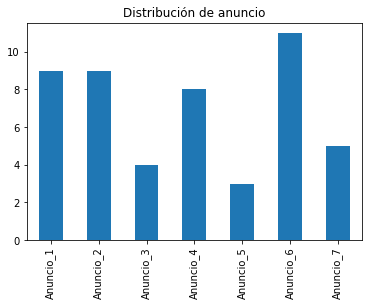

In [23]:
print(df.anuncio.value_counts())
plt.title('Distribución de anuncio')
df.anuncio.value_counts().sort_index().plot(kind='bar')

### Valores de `ubicacion`.

Buenos Aires, Argentina    41
Rosario, Argentina          4
Cordoba, Argentina          3
Paraná, Argentina           1
Name: ubicacion, dtype: int64


<AxesSubplot:title={'center':'Distribución de ubicacion'}>

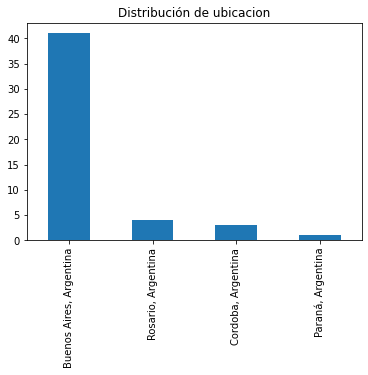

In [24]:
print(df.ubicacion.value_counts())
plt.title('Distribución de ubicacion')
df.ubicacion.value_counts().plot(kind='bar')

### Valores de `fecha`.

2020-05-23    10
2020-03-19     8
2020-04-25     8
2020-03-29     8
2020-06-04     5
2020-04-10     4
2020-05-08     3
2020-03-28     2
2020-01-09     1
Name: fecha_sola, dtype: int64


<AxesSubplot:title={'center':'Distribución de fechas'}>

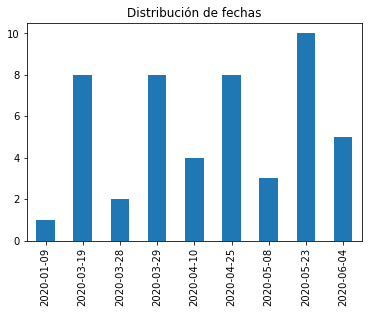

In [25]:
df['fecha_sola'] = df['fecha'].map(lambda x: str(x)[:-15])
print(df.fecha_sola.value_counts())
plt.title('Distribución de fechas')
df.fecha_sola.value_counts().sort_index().plot(kind='bar')

Para poder aprovechar las funcionalidades después, es conveniente convertir el campo "fecha" en timestamp.

In [26]:
df['fecha'] = pd.to_datetime(df['fecha'])

### Valores de `tweet`.

Procedemos a chusmear los valores de los tweets.

In [27]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
df.tweet.head(3)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

2020-05-23    10
2020-03-19     8
2020-04-25     8
2020-03-29     8
2020-06-04     5
2020-04-10     4
2020-05-08     3
2020-03-28     2
2020-01-09     1
Name: fecha_sola, dtype: int64


<AxesSubplot:title={'center':'Distribución de fechas'}>

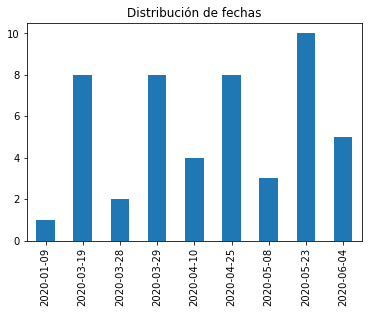

In [28]:
print(df.fecha_sola.value_counts())
fecha_sola = df['fecha'].map(lambda x: str(x)[:-15])
plt.title('Distribución de fechas')
fecha_sola.value_counts().sort_index().plot(kind='bar')

### Creación de variable _target_: `sentimiento`.

Crearemos la variable target para, posteriormente, poder realizar la clasificación. Por el momento estará vacía.

In [29]:
df['sentimiento'] = ''

## Limpieza.

Tamaño del dataset previo a la limpieza:

In [30]:
df.shape

(49, 8)

### Limpieza por usuarios específicos.

#### Trolls.
Procedemos a limpiar a los usuarios que son trolls.

In [31]:
#definimos una lista negra de los usuarios que vamos a eliminar
usuarios_blacklist = ['sergistack', 'GamesRedDeer']
mask_bl = [x in usuarios_blacklist for x in df['username']] 

In [32]:
#definimos una máscara para excluir a los usuarios en la lista negra
mask_not_bl = [x not in usuarios_blacklist for x in df['username']] 
#pisamos el dataframe sin los usuarios de la lista negra
df = df[mask_not_bl]
df.shape[0]

47

#### Medios de comunicación.
Procedemos a limpiar a los usuarios que son medios de comunicación.

In [33]:
usuarios_medios = ['gustavorearte1','gerdellamonica','radiofonica1007',' pmgcharly',' NTodxs',' Noticiasde_',' nora_verges',' mnspezzapria',' METRO_RADIO_TV',' MartinD50004804',' mariogaloppo',' LUIS20GEREZ',' losprimerostuc',' lacriticaok',' lacapital',' IldefonsoM',' HernanMundo',' elsolquilmes',' ellitoral',' cronica',' cordoba',' Contexto_Tuc',' ConLaGenteRos',' con_sello',' Cadena3Com',' AvellanedaReal',' AiredeSantaFe',' AgenciaDib',' Adry1BC',' ADNsur',' abccordoba',' 104Urbana']
mask_media = [x in usuarios_medios for x in df['username']] 

In [34]:
#definimos una máscara para excluir a los usuarios en la lista negra
mask_not_media = [x not in usuarios_medios for x in df['username']] 
#pisamos el dataframe sin los usuarios de la lista negra
df = df[mask_not_media]
df.shape[0]

(47, 8)

### Eliminación de duplicados.
Limpiamos los duplicados.

In [35]:
df.drop_duplicates(subset=['tweet'], keep=False, inplace=True)
df.shape

(47, 8)

### Guardamos el dataset filtrado.

In [57]:
ruta = "Data/Crudos/tweets_crudos_limpios_"+str(time.time())+".csv"
df.to_csv(ruta, sep=';', index=False)

## Merge de datasets.

### Dataset con todos los tweets obtenidos hasta el momento.

Importamos el dataset con todos los tweets.

In [60]:
search = input("Insertar el nombre de archivo del CSV:")
df_sin_clasificar = pd.read_csv(f"Data/Crudos/{search.lower()}.csv", sep=';')   

Insertar el nombre de archivo del CSV: tweets_crudos_limpios_1598365897.8135712


In [61]:
print(df_sin_clasificar.shape)
df_sin_clasificar.head(3)

(47, 7)


,username,tweet,fecha,anuncio,ubicacion,fecha_sola,sentimiento
0,Elizabeth789741,alferdez alferdezprensa por favor qxsea a part...,2020-03-19 23:04:48+00:00,Anuncio_1,"Buenos Aires, Argentina",2020-03-19,NaN
1,vickyuliyapo,comodice inesazpelicueta que comiencen ya a el...,2020-03-19 22:57:33+00:00,Anuncio_1,"Buenos Aires, Argentina",2020-03-19,NaN
2,RUCHOCASLA,alferdez alferdezprensa a los que enganchan en...,2020-03-19 20:28:12+00:00,Anuncio_1,"Buenos Aires, Argentina",2020-03-19,NaN


### Dataset con tweets clasificados manualmente.

Importamos el dataset con los tweets ya clasificados. Este paso requiere que hayamos renombrado el dataset como **tweets_clasificados.csv** para evitar pisarlo.

In [38]:
df_clasificados = pd.read_csv('Data/Clasificados/tweets_clasificados.csv', sep=';')    
print(df_clasificados.shape)
df_clasificados.head(3)

(807, 7)


,username,tweet,fecha,anuncio,ubicacion,id,sentimiento
0,VozdeRosario,coronavirus suman 5527 los fallecidos y 282437...,2020-08-14 23:36:23+00:00,Anuncio_11,"Rosario, Argentina",1294417616153560000,Neutral
1,VozdeRosario,un arquero de la seleccion argentina fue diagn...,2020-08-14 23:18:04+00:00,Anuncio_11,"Rosario, Argentina",1294413007334800000,Neutral
2,VozdeRosario,coronavirus en rosario 77 nuevos casos en la c...,2020-08-14 23:13:34+00:00,Anuncio_11,"Rosario, Argentina",1294411876374380000,Neutral


## Merge entre dataset clasificado y sin clasificar.

Procedemos a impactar las clasificaciones al dataset completo con un merge por `id`.

In [39]:
clasificados = df_sin_clasificar.sentimiento != ''
print('Cantidad de tweets clasificados en el dataset, previo al merge:',clasificados.sum())

Cantidad de tweets clasificados en el dataset, previo al merge: 47


C:\Users\Manu\anaconda3\envs\tweets\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [40]:
df_sin_clasificar = df_sin_clasificar.set_index('id')
df_clasificados = df_clasificados.set_index('id')

In [41]:
df_merge = pd.merge(df_sin_clasificar, df_clasificados, how='left', on=['id'])

### Comprobación de merge exitoso.

Para comprobar que el merge haya sido exitoso, verificamos que el número de no nulos sea el mismo que la cantidad de registros en el dataset de clasificados:

In [42]:
df_merge.sentimiento_y.value_counts().values.sum() == df_clasificados.shape[0]

False

También verificamos visualmente que coincidan las imputaciones de las clasificaciones:

In [43]:
df_merge.loc[df_merge.sentimiento_y.notnull(), ['username_x', 'tweet_x','sentimiento_x','username_y','tweet_y','sentimiento_y']]

,username_x,tweet_x,sentimiento_x,username_y,tweet_y,sentimiento_y
id,,,,,,


Revisamos a cuántos tweets se les impactó el valor de `sentimiento`:

In [44]:
print('Cantidad de tweets clasificados en el dataset, luego del merge:', df_merge.sentimiento_y.notnull().sum())

Cantidad de tweets clasificados en el dataset, luego del merge: 0


Habiendo comprobado que el merge fue exitoso, procedemos a: 
* Eliminar las columnas repetidas: de las conlumnas sufijo "_y_" nos quedaremos con "sentimiento_y" y eliminaremos el resto. 
* Renombrar las columnas a como estaban originalmente, es decir, quitándoles el sufijo "_x_".
* Renombrar el dataframe como "df".

In [45]:
df_merge.columns

Index(['username_x', 'tweet_x', 'fecha_x', 'anuncio_x', 'ubicacion_x',
       'fecha_sola', 'sentimiento_x', 'username_y', 'tweet_y', 'fecha_y',
       'anuncio_y', 'ubicacion_y', 'sentimiento_y'],
      dtype='object')

In [46]:
df_merge.drop(columns=['username_y', 'tweet_y', 'fecha_y', 'anuncio_y', 'ubicacion_y', 'sentimiento_x'], inplace=True)

In [47]:
df_merge.columns

Index(['username_x', 'tweet_x', 'fecha_x', 'anuncio_x', 'ubicacion_x',
       'fecha_sola', 'sentimiento_y'],
      dtype='object')

In [48]:
df_merge.rename(columns={'username_x':'username', 'tweet_x':'tweet', 'fecha_x':'fecha', 'anuncio_x':'anuncio', 'ubicacion_x':'ubicacion', 'sentimiento_y':'sentimiento'}, inplace=True)

In [49]:
df_merge.columns

Index(['username', 'tweet', 'fecha', 'anuncio', 'ubicacion', 'fecha_sola',
       'sentimiento'],
      dtype='object')

In [50]:
df = df_merge
df.shape

(47, 7)

### Export del dataset consolidado.

También exportaremos el dataset para preservarlo y continuar con las clasificaciones faltantes a través del método "Mechanical Turk".

In [51]:
nombre = "tweets_parcialmente_clasificados.csv"
ruta_drive = "/content/drive/My Drive/TP Integrador/Notebooks/Data/"+nombre
ruta_local = "Data/"+nombre

print(ruta_drive)
print(ruta_local)

/content/drive/My Drive/TP Integrador/Notebooks/Data/tweets_parcialmente_clasificados.csv
Data/tweets_parcialmente_clasificados.csv


In [52]:
try:
    df.to_csv(ruta_drive, sep=';', index=False)
except:
    df.to_csv(ruta_local, sep=';', index=False)  

### Export del dataset sin clasificar.

También exportaremos el dataset de los que quedan sin clasificar.

In [53]:
df_sin_clasificar = df[(df.sentimiento.isna()) | (df.sentimiento == '')]
qfilas = df_sin_clasificar.shape[0]
qfilas = int(round(qfilas / 2, 0))

In [54]:
segunda_mitad = df_sin_clasificar.iloc[qfilas:]
primera_mitad = df_sin_clasificar.iloc[:qfilas]

primera_mitad.shape, segunda_mitad.shape

((24, 7), (23, 7))

In [55]:
nombre_mitad_1 = "1ra_mitad_tweets_sin_clasificar.csv"
nombre_mitad_2 = "2da_mitad_tweets_sin_clasificar.csv"

ruta_drive_mitad_1 = "/content/drive/My Drive/TP Integrador/Notebooks/Data/"+nombre_mitad_1
ruta_drive_mitad_2 = "/content/drive/My Drive/TP Integrador/Notebooks/Data/"+nombre_mitad_2
ruta_local_mitad_1 = "Data/"+nombre_mitad_1
ruta_local_mitad_2 = "Data/"+nombre_mitad_2

In [56]:
try:
    primera_mitad.to_csv(ruta_drive_mitad_1, sep=';', index=False)
    segunda_mitad.to_csv(ruta_drive_mitad_2, sep=';', index=False)
except:
    primera_mitad.to_csv(ruta_local_mitad_1, sep=';', index=False)
    segunda_mitad.to_csv(ruta_local_mitad_2, sep=';', index=False)

Ahora sí... ¡a trabajar en el modelo!